## Inportación de Librerias y Declaración de Funciones

In [1]:
import opendatasets as od
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def graf_expl (dataset):

    # Se preparan las visualizaciones 
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (12,8))
    fig.subplots_adjust(hspace=0.3)
    axes = axes.flatten()
    ax = axes[0]
    # Exploramos la distribución de las edades según el sexo en el dataset
    sns.boxplot(x='Sex', y='Age', data=dataset, palette=['#73DAF5','#F5C5F5'],ax=ax)
    ax.set_xticklabels(['Hombre','Mujer'])
    ax.set_title('a) Distribución de edad según Sexo')
    ax = axes[1]
    # Distribución de los datos según sexo
    sns.countplot(x='Sex', data=dataset, palette=['#73DAF5','#F5C5F5'],ax=ax)
    ax.set_xticklabels(['Hombre','Mujer'])
    ax.set_title('b) Distribución por Sexo')
    ax = axes[2]
    # Revisamos que tan balanceadas estan nuestras clases
    sns.countplot(x="Survived", data=dataset, palette=['#F57373','#8FF573'],ax=ax)
    ax.set_title('c) Distribución de variable Target')
    ax.set_xticklabels(['No sobrevive','Sobrevive'],rotation=0)
    ax = axes[3]
    #Frecuencia de diagnóstico por sexo
    pd.crosstab(dataset.Sex,dataset.Survived).plot(kind="bar",ax=ax,color=['#8FF573','#F57373'])
    ax.set_title('d) Frecuencia de diagnóstico por Sexo')
    ax.set_xticklabels(['Mujer','Hombre'],rotation=0)
    ax.legend(["No sobrevive", "Sobrevive"])
    ax.set_ylabel('Frecuencia')

In [3]:
### Función para preparar los conjuntos de datos de entrenamiento y testeo

def prep_data (dataset):
    #Quitamos columnas con informacion unica
    dataset.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True, )

    #Rellenando los NA de la edad con la media
    median_age = dataset['Age'].median()
    dataset['Age'].fillna(median_age, inplace=True)
    dataset['Age']=dataset['Age'].astype(int)

    #Rellenando el NA de Fare
    median_fare = dataset['Fare'].median()
    dataset['Fare'].fillna(median_fare, inplace=True)

    #Se rellenan 2 na de Embarked con la moda (S)
    embarked_mode = dataset['Embarked'].mode()
    dataset['Embarked'].fillna(embarked_mode.values[0], inplace=True)

    #Binarizar columna Cabin
    dataset["Cabin"] = dataset["Cabin"].astype(str) != 'nan'
    dataset["Cabin"] = dataset["Cabin"].astype(int)


    dataset.info()

In [4]:
def binarizacion (dataset):

    #Binarización de las variables categóricas
    dataset["Sex"] = dataset['Sex'].replace(['female','male'],[0,1])
    dataset["Sex"] = dataset["Sex"].astype(int)
    Age_dum = pd.get_dummies(dataset['Age_cat'], prefix = "age")
    Fare_dum = pd.get_dummies(dataset['Fare_cat'], prefix = "fare")
    Embarked_dum = pd.get_dummies(dataset['Embarked'], prefix = "embarked")

    #Añadimos las nuevas variables, ahora como dummies, al dataset
    dataset = pd.concat([dataset, Embarked_dum, Age_dum, Fare_dum], axis = 1)
    #Se borran también algunos dummies para asegurar invertibilidad de la matríz 
    dataset = dataset.drop(columns = ['Age', 'Fare', 'Embarked',"Age_cat","Fare_cat","embarked_C","age_old","fare_expensive"])
    return dataset.head()

## Importación de Datasets

In [5]:
od.download("https://www.kaggle.com/c/titanic/data")
{"username":"dgrone","key":"8e16739c70ce24ea1e6d9a45b61e9796"}

Skipping, found downloaded files in ".\titanic" (use force=True to force download)


{'username': 'dgrone', 'key': '8e16739c70ce24ea1e6d9a45b61e9796'}

##### Conjunto de Entrenamiento

In [6]:
#train_folder = "c:/Users/pablo/OneDrive/Documentos/GitHub/MDS-Notebooks/03-MLA/titanic/train.csv"
train_folder = "titanic/train.csv"

train = pd.read_csv(train_folder)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


###### Conjunto de Prueba

In [7]:
#test_folder = "c:/Users/pablo/OneDrive/Documentos/GitHub/MDS-Notebooks/03-MLA/titanic/test.csv"
test_folder = "titanic/test.csv"

test = pd.read_csv(test_folder)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Exploración y Preparación de Datos de Entrenamiento

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
prep_data(train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    int32  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    int32  
 8   Embarked  891 non-null    object 
dtypes: float64(1), int32(2), int64(4), object(2)
memory usage: 55.8+ KB


In [10]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22,1,0,7.2500,0,S
1,1,1,female,38,1,0,71.2833,1,C
2,1,3,female,26,0,0,7.9250,0,S
3,1,1,female,35,1,0,53.1000,1,S
4,0,3,male,35,0,0,8.0500,0,S


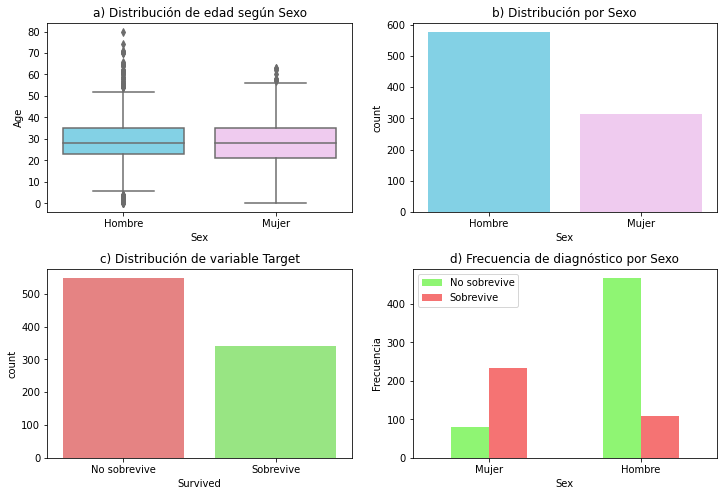

In [11]:
graf_expl (train)

<AxesSubplot:>

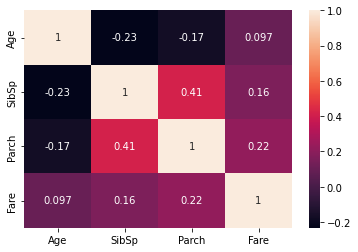

In [12]:
#Representación de Heatmap todas las variables contínuas
corrMatrix_cont = train[['Age','SibSp', 'Parch', 'Fare']].corr('pearson')
sns.heatmap(corrMatrix_cont, annot=True)

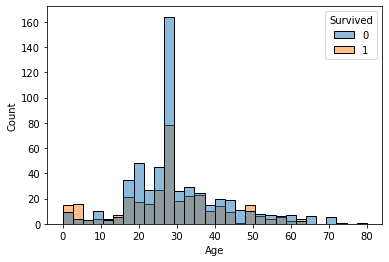

In [13]:
sns.histplot(x='Age', data=train, hue='Survived')
#Se crea una variable categorica para la edad con el proposito de separar a las personas menores a 10 anos
train['Age_cat'] = pd.cut(train['Age'], bins=[-1, 10, 60, float('Inf')], labels=['kid', 'adult', 'old'])

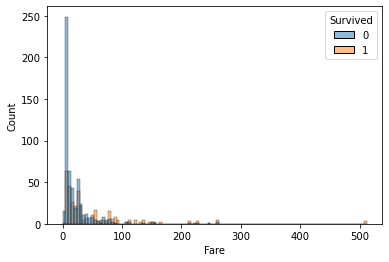

In [14]:
sns.histplot(x='Fare', data=train, hue='Survived')
#Se puede crear también una variable categórica para las tarifas mayores a 50.
train['Fare_cat'] = pd.cut(train['Fare'], bins=[-1, 80, float('Inf')], labels=['cheap', 'expensive'])

In [15]:
binarizacion(train)

,Survived,Pclass,Sex,SibSp,Parch,Cabin,embarked_Q,embarked_S,age_kid,age_adult,fare_cheap
0,0,3,1,1,0,0,0,1,0,1,1
1,1,1,0,1,0,1,0,0,0,1,1
2,1,3,0,0,0,0,0,1,0,1,1
3,1,1,0,1,0,1,0,1,0,1,1
4,0,3,1,0,0,0,0,1,0,1,1


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    int64   
 2   Sex       891 non-null    int32   
 3   Age       891 non-null    int32   
 4   SibSp     891 non-null    int64   
 5   Parch     891 non-null    int64   
 6   Fare      891 non-null    float64 
 7   Cabin     891 non-null    int32   
 8   Embarked  891 non-null    object  
 9   Age_cat   891 non-null    category
 10  Fare_cat  891 non-null    category
dtypes: category(2), float64(1), int32(3), int64(4), object(1)
memory usage: 54.3+ KB
